# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading in Train Data


In [2]:
train = pd.read_csv('Titanic_data_set.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Analysis

# (i) Checking for Missing Data

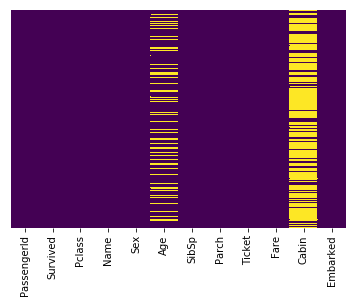

In [5]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

# (ii) Finding the number of unique values in each column

In [6]:
def values(cols):
    a = train[cols].nunique()
    b = train[cols].unique()
    print("Number of unique values in", cols, "column is:", a)
    print("Unique values in", cols, "column are: ", b)
    print(" ")
    
values('Survived') # Survived = 0 indicates 'No' and Survived = 1 indicates = 'Yes'
values('Pclass')   # There are 3 unique classes 1,2 and 3
values('Sex') # All the passengers onboarded are either male or female
values('SibSp') # Any passenger onboarded has 0-8 siblings on the ship; Sp indicates Spouse
values('Parch') # 'Par' is onboarded with Parents, 'Ch' is onboarded with Children; 
                # Parch = 0 => Passengers with no Parent - Child relationship
values('Embarked') # There are 3 ports of Embarkation 'S' : Southampton, 'C': Cherbourg, 'Q': Queenstown

Number of unique values in Survived column is: 2
Unique values in Survived column are:  [0 1]
 
Number of unique values in Pclass column is: 3
Unique values in Pclass column are:  [3 1 2]
 
Number of unique values in Sex column is: 2
Unique values in Sex column are:  ['male' 'female']
 
Number of unique values in SibSp column is: 7
Unique values in SibSp column are:  [1 0 3 4 2 5 8]
 
Number of unique values in Parch column is: 7
Unique values in Parch column are:  [0 1 2 5 3 4 6]
 
Number of unique values in Embarked column is: 3
Unique values in Embarked column are:  ['S' 'C' 'Q' nan]
 


# (iii) Data Visualization and comparision of columns

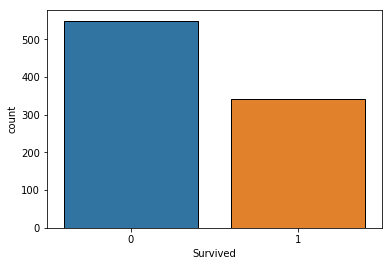

In [7]:
sns.countplot(x = 'Survived',data = train,ec='black')

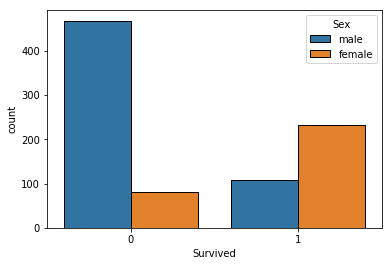

In [8]:
sns.countplot(x = 'Survived',hue = 'Sex', data = train,ec='black')

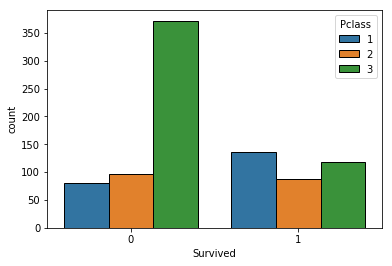

In [9]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train,ec='black')

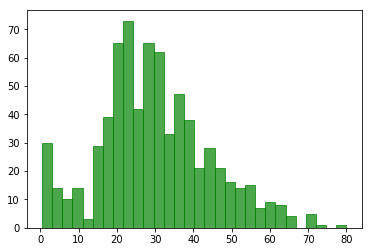

In [10]:
plt.hist(x=train['Age'].dropna(),bins=30,color='green',alpha = 0.7,ec='green')
plt.show()

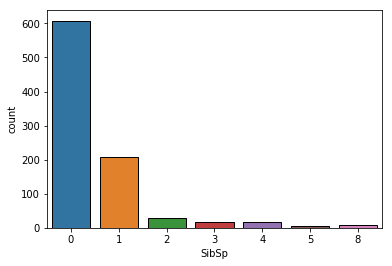

In [11]:
sns.countplot(x = 'SibSp',data = train,ec = 'black')

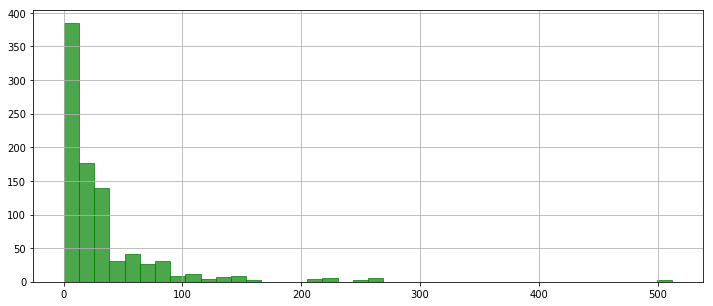

In [12]:
train['Fare'].hist(color='green',alpha=0.7,bins=40,figsize=(12,5),ec='green')

# Data Cleaning

(i) Substituting for null values in 'Age' column

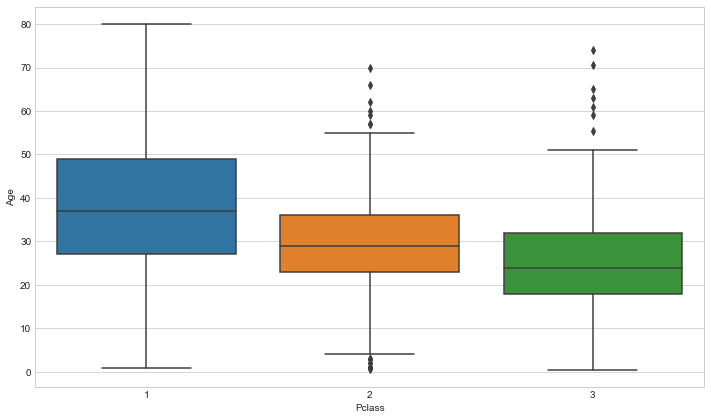

In [13]:
plt.figure(figsize=(12,7))
sns.set_style(style = 'whitegrid')
sns.boxplot(x='Pclass',y='Age',data=train)
plt.show()

In [14]:
def substitute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
    
        

In [15]:
train['Age'] = train[['Age','Pclass']].apply(substitute_age,axis=1)

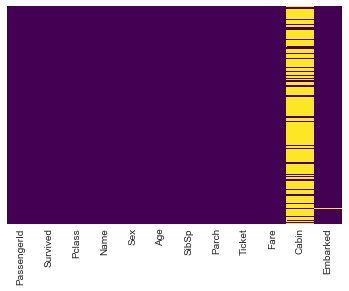

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

(ii) Substituting 'Null' in place of Null values in 'Cabin' Column

In [17]:
def split(cabin):
    if pd.isnull(cabin):
        cabin_letter = 'Null'
    else:
        cabin_letter = cabin[0]
    return cabin_letter

train['cabin_let'] = train['Cabin'].apply(split)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_let
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Null
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Null
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Null


In [18]:
values('cabin_let')

Number of unique values in cabin_let column is: 9
Unique values in cabin_let column are:  ['Null' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
 


In [19]:
train.drop('Cabin',axis=1,inplace=True)

In [20]:
train.dropna(inplace=True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
cabin_let      889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


# Converting Categorical Features

In [22]:
def split_title(Name):
    dl1 = ','
    dl2 = '.'
    Title = (Name.split(dl1)[1]).split(dl2)[0]
    return Title

train['Title'] = train['Name'].apply(split_title)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_let,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Null,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Null,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Null,Mr


In [23]:
values('Title')

Number of unique values in Title column is: 17
Unique values in Title column are:  [' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']
 


In [24]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
pclass = pd.get_dummies(train['Pclass'],drop_first=True)
cabin = pd.get_dummies(train['cabin_let'],drop_first=True)
title = pd.get_dummies(train['Title'],drop_first=True)


In [25]:
def split_ticket(Ticket):
    Title = Ticket.split()
    if len(Title) == 1:
        if Title[0] == 'LINE':
            Ticket_new = '111111'
        else:
            Ticket_new = Title[0]
    else:
        if Title[1] == 'Basle':
            Ticket_new = '222222'
        else:
            Ticket_new = Title[1]
        
    return Ticket_new


In [26]:
train['Ticket_new'] = train['Ticket'].apply(split_ticket)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_let,Title,Ticket_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Null,Mr,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Null,Miss,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,Mrs,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Null,Mr,373450


# Dropping unnecessary Columns

In [27]:
train.drop(['Sex','Embarked','Pclass','Name','Ticket','Title','Ticket_new','cabin_let'],axis=1,inplace=True)

In [28]:
train = pd.concat([train,sex,embark,pclass,title,cabin],axis=1)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 35 columns):
PassengerId      889 non-null int64
Survived         889 non-null int64
Age              889 non-null float64
SibSp            889 non-null int64
Parch            889 non-null int64
Fare             889 non-null float64
male             889 non-null uint8
Q                889 non-null uint8
S                889 non-null uint8
2                889 non-null uint8
3                889 non-null uint8
 Col             889 non-null uint8
 Don             889 non-null uint8
 Dr              889 non-null uint8
 Jonkheer        889 non-null uint8
 Lady            889 non-null uint8
 Major           889 non-null uint8
 Master          889 non-null uint8
 Miss            889 non-null uint8
 Mlle            889 non-null uint8
 Mme             889 non-null uint8
 Mr              889 non-null uint8
 Mrs             889 non-null uint8
 Ms              889 non-null uint8
 Rev             889 non-nu

In [30]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,...,Sir,the Countess,B,C,D,E,F,G,Null,T
0,1,0,22.0,1,0,7.2500,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Building a Logistic Regression Model

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],
                                                    test_size=0.30,random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
predictions = logmodel.predict(X_test)

# Evaluating the model

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
Matrix = confusion_matrix(y_test,predictions)
print(Matrix)

[[151  12]
 [ 28  76]]


In [38]:
correct = sum(Matrix.diagonal())
print("Sum of TP and TN is", correct)

total = sum(sum(Matrix))
print("Total sum is", total)

Sum of TP and TN is 227
Total sum is 267


In [39]:
Accuracy = correct/total
print("Accuracy of the model is", round(Accuracy*100,2), "%")

Accuracy of the model is 85.02 %
